# Basic Libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import math
import random

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeLondon
machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Important Functions

In [2]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import Hammifier, circs

#Readout Mit Functions
#from ReadoutMit import prepare_circuit, modify_counts, symmetry

# Expectation Value/Running Functions
from Result_ReadoutMit3 import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, prepare_circuit_normal, prepare_circuit, modify_counts, symmetry, evaluator

# Restricted Range Info

In [3]:
'''------------Interatomic Distance = 0.74--------------
HF energy: -1.831863646477506
# of electrons: 2
# of spin orbitals: 4
Number of qubits are : 2
[ 0.00172129 -0.00182397 -0.11217598]
VQE Result: -1.1011690791894007 Exact Energy: -1.1372838344885012
All energies have been calculated'''

'------------Interatomic Distance = 0.74--------------\nHF energy: -1.831863646477506\n# of electrons: 2\n# of spin orbitals: 4\nNumber of qubits are : 2\n[ 0.00172129 -0.00182397 -0.11217598]\nVQE Result: -1.1011690791894007 Exact Energy: -1.1372838344885012\nAll energies have been calculated'

# Noise Model

In [4]:
'''

def generateDepolarizingError(machine, gate, qubits)

def generateRelaxationError(machine, gate, qubits, t1, t2, amp = 1, custom_t = False):
    """
    Return a relaxation error
    """

def generateNoiseModel(machine, coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """

'''

from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel

In [5]:
 noise_model = generateNoiseModel(machine, coherent = True, incoherent = True, readout= True)

Original: 0.01 0.050000000000000044
Reverse: 0.01 0.050000000000000044
Original: 0.02 0.07666666666666666
Reverse: 0.02 0.07666666666666666
Original: 0.14 0.18999999999999995
Reverse: 0.14 0.18999999999999995
Original: 0.0033333333333332993 0.03
Reverse: 0.0033333333333332993 0.03
Original: 0.006666666666666667 0.043333333333333335
Reverse: 0.006666666666666667 0.043333333333333335


# Variational Form
For Hydrogen

In [6]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

# Running Circuits for different Param

In [7]:
counter = 0

def EnergyFinder(param):
    '''
    Input: param (1D array) for which to compute energy on VQE circ of H2
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    global noise_model
    samples = 8192
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    circs_nr = circs(circuits)
    circs_r = circs(circuits)
    circs_ideal = circs(circuits)
    #print('no mit')
    noisy_r = evaluator(circs_r, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = False)
    #print('mit')
    noisy_nr = evaluator(circs_nr, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = True)
    #print('no mit')
    ideal = evaluator(circs_ideal, samples, None, Hamiltonian, Hamiltonian_weights, simulator, False)
    #print('done')
    return noisy_r, noisy_nr, ideal

def main():
    '''
    Choose param and compute mean
    '''
    d = -math.pi
    u = math.pi
    
    energies = []
    diff_r = []
    diff_nr = []
    params = []
    
    for i in range(1000):
        print(i)
    
        p1 = random.uniform(0.001, 0.002)
        p2 = random.uniform(-0.002, -0.001)
        p3 = random.uniform(-0.2, -0.1)


        noisy_r,noisy_nr, ideal = EnergyFinder([p1,p2,p3])
        energies.append([[p1,p2,p3], ideal, noisy_r, noisy_nr])
        diff_r.append(noisy_r-ideal)
        diff_nr.append(noisy_nr-ideal)
        
        print('Noisy diff is ' + str(noisy_r-ideal))
        print('Mitigated diff is ' + str(noisy_nr-ideal))
        
    return energies, diff_r, diff_nr
energies, diff_r, diff_nr = main()

0
Noisy diff is 0.09198852539062519
Mitigated diff is 0.05804785853794647
1
Noisy diff is 0.09066333007812488
Mitigated diff is 0.049680050744519866
2
Noisy diff is 0.09122534179687491
Mitigated diff is 0.050915711567078414
3
Noisy diff is 0.10067065429687494
Mitigated diff is 0.05711500412734516
4
Noisy diff is 0.10223022460937503
Mitigated diff is 0.05288426112732769
5
Noisy diff is 0.09508569335937489
Mitigated diff is 0.05565326504550128
6
Noisy diff is 0.09405346679687476
Mitigated diff is 0.04337625081082086
7
Noisy diff is 0.0972443847656248
Mitigated diff is 0.05615605838389026
8
Noisy diff is 0.09174438476562496
Mitigated diff is 0.04205078756963543
9
Noisy diff is 0.08933007812500005
Mitigated diff is 0.05145919742041549
10
Noisy diff is 0.09427197265624987
Mitigated diff is 0.04572911302270932
11
Noisy diff is 0.08416674804687485
Mitigated diff is 0.05048049125899645
12
Noisy diff is 0.09435424804687509
Mitigated diff is 0.04935555817880055
13
Noisy diff is 0.093866943359374

Noisy diff is 0.08040649414062506
Mitigated diff is 0.05298130473042573
111
Noisy diff is 0.09519702148437514
Mitigated diff is 0.052383586600785126
112
Noisy diff is 0.09506152343749996
Mitigated diff is 0.04692380994114376
113
Noisy diff is 0.09031762695312517
Mitigated diff is 0.05759943528693556
114
Noisy diff is 0.09878149414062509
Mitigated diff is 0.05215730317317213
115
Noisy diff is 0.08784912109374998
Mitigated diff is 0.04275346059647789
116
Noisy diff is 0.091841552734375
Mitigated diff is 0.05387838959001079
117
Noisy diff is 0.09060131835937502
Mitigated diff is 0.05338628984947369
118
Noisy diff is 0.10310742187499988
Mitigated diff is 0.05813101164243761
119
Noisy diff is 0.09347143554687509
Mitigated diff is 0.05212598380711775
120
Noisy diff is 0.09579589843749992
Mitigated diff is 0.04632379503634376
121
Noisy diff is 0.08223657226562509
Mitigated diff is 0.05767154953878606
122
Noisy diff is 0.09863085937499994
Mitigated diff is 0.055438919533157716
123
Noisy diff i

Noisy diff is 0.089740234375
Mitigated diff is 0.05433436677255021
219
Noisy diff is 0.09497827148437499
Mitigated diff is 0.050768369689121906
220
Noisy diff is 0.08957153320312483
Mitigated diff is 0.058187617628681965
221
Noisy diff is 0.10534252929687471
Mitigated diff is 0.0562545005341879
222
Noisy diff is 0.09560351562499991
Mitigated diff is 0.06149688326423042
223
Noisy diff is 0.08512329101562499
Mitigated diff is 0.04155902783739718
224
Noisy diff is 0.08811206054687482
Mitigated diff is 0.04941577196138658
225
Noisy diff is 0.09824584960937499
Mitigated diff is 0.05232068529885936
226
Noisy diff is 0.10232861328124976
Mitigated diff is 0.06619301131810862
227
Noisy diff is 0.08589843750000004
Mitigated diff is 0.04708883916647588
228
Noisy diff is 0.10072583007812497
Mitigated diff is 0.056157862282032234
229
Noisy diff is 0.09535229492187502
Mitigated diff is 0.05771783643287698
230
Noisy diff is 0.09510058593749982
Mitigated diff is 0.05616603738866521
231
Noisy diff is 0

Noisy diff is 0.08598364257812507
Mitigated diff is 0.04541174152453453
327
Noisy diff is 0.08451123046875009
Mitigated diff is 0.0548643984117414
328
Noisy diff is 0.09124609375000003
Mitigated diff is 0.053698772326539634
329
Noisy diff is 0.0869450683593751
Mitigated diff is 0.0583771980705825
330
Noisy diff is 0.08555493164062478
Mitigated diff is 0.055657752224988366
331
Noisy diff is 0.09847827148437505
Mitigated diff is 0.04573991839323854
332
Noisy diff is 0.09531396484374977
Mitigated diff is 0.05069023109594384
333
Noisy diff is 0.08744921875
Mitigated diff is 0.052331968769078197
334
Noisy diff is 0.09003637695312494
Mitigated diff is 0.05131076925461686
335
Noisy diff is 0.0926291503906248
Mitigated diff is 0.048878645563026346
336
Noisy diff is 0.0924536132812499
Mitigated diff is 0.044139314271882446
337
Noisy diff is 0.08749804687499985
Mitigated diff is 0.05204518464890007
338
Noisy diff is 0.08435961914062484
Mitigated diff is 0.0536489335326924
339
Noisy diff is 0.097

Noisy diff is 0.08843383789062498
Mitigated diff is 0.04799295301457174
435
Noisy diff is 0.09253662109374994
Mitigated diff is 0.05577704523002458
436
Noisy diff is 0.0983391113281249
Mitigated diff is 0.05128975795345703
437
Noisy diff is 0.09536279296875005
Mitigated diff is 0.05509293297847995
438
Noisy diff is 0.08972534179687486
Mitigated diff is 0.05532103064133276
439
Noisy diff is 0.08957104492187495
Mitigated diff is 0.056398090235376674
440
Noisy diff is 0.09373974609375013
Mitigated diff is 0.061990447748361266
441
Noisy diff is 0.0913210449218751
Mitigated diff is 0.0439734180641409
442
Noisy diff is 0.09348828124999997
Mitigated diff is 0.05848465783348589
443
Noisy diff is 0.09337890625000012
Mitigated diff is 0.06107673108194889
444
Noisy diff is 0.09162890624999998
Mitigated diff is 0.04745876605264132
445
Noisy diff is 0.09002099609375014
Mitigated diff is 0.05016684780197722
446
Noisy diff is 0.10001684570312486
Mitigated diff is 0.05423965994400537
447
Noisy diff is

Noisy diff is 0.09723950195312492
Mitigated diff is 0.05847510194883232
543
Noisy diff is 0.09561621093749983
Mitigated diff is 0.05025384301611724
544
Noisy diff is 0.09062670898437486
Mitigated diff is 0.059473207489125546
545
Noisy diff is 0.1018115234375001
Mitigated diff is 0.05012096960766721
546
Noisy diff is 0.10229565429687515
Mitigated diff is 0.053773031493246526
547
Noisy diff is 0.08622167968750005
Mitigated diff is 0.05437524634653568
548
Noisy diff is 0.0887097167968749
Mitigated diff is 0.05179435686383904
549
Noisy diff is 0.08485571289062499
Mitigated diff is 0.04528063641449087
550
Noisy diff is 0.09158129882812494
Mitigated diff is 0.043203196385276144
551
Noisy diff is 0.09531347656250011
Mitigated diff is 0.06244922059842106
552
Noisy diff is 0.09768139648437502
Mitigated diff is 0.05441909006791845
553
Noisy diff is 0.09572412109374995
Mitigated diff is 0.050274937076174586
554
Noisy diff is 0.09715014648437492
Mitigated diff is 0.05410579367464141
555
Noisy diff

Noisy diff is 0.09056079101562486
Mitigated diff is 0.061537643836959255
651
Noisy diff is 0.0830776367187499
Mitigated diff is 0.04915702022506374
652
Noisy diff is 0.09394702148437517
Mitigated diff is 0.04606242645073633
653
Noisy diff is 0.08830664062500004
Mitigated diff is 0.05961232632926983
654
Noisy diff is 0.106222412109375
Mitigated diff is 0.06347262757316474
655
Noisy diff is 0.09357739257812503
Mitigated diff is 0.05648904634319685
656
Noisy diff is 0.09839404296874998
Mitigated diff is 0.06095399772298382
657
Noisy diff is 0.10156933593750006
Mitigated diff is 0.05894781731901211
658
Noisy diff is 0.10430786132812497
Mitigated diff is 0.058581182212969374
659
Noisy diff is 0.08595751953124986
Mitigated diff is 0.04728093449519233
660
Noisy diff is 0.10129321289062498
Mitigated diff is 0.0458094247344476
661
Noisy diff is 0.09125756835937482
Mitigated diff is 0.05739196506076372
662
Noisy diff is 0.0874340820312498
Mitigated diff is 0.04432978553785949
663
Noisy diff is 0

Noisy diff is 0.092850830078125
Mitigated diff is 0.0485531114068225
759
Noisy diff is 0.087132568359375
Mitigated diff is 0.03716186076238892
760
Noisy diff is 0.09258447265624992
Mitigated diff is 0.051820749711169345
761
Noisy diff is 0.09182397460937497
Mitigated diff is 0.059825544919490214
762
Noisy diff is 0.08438208007812498
Mitigated diff is 0.0451915268000227
763
Noisy diff is 0.08993383789062492
Mitigated diff is 0.04660488370678806
764
Noisy diff is 0.09827880859374982
Mitigated diff is 0.058533531030601216
765
Noisy diff is 0.09751025390624979
Mitigated diff is 0.05987935610198303
766
Noisy diff is 0.09860424804687506
Mitigated diff is 0.05595471601338309
767
Noisy diff is 0.09544506835937483
Mitigated diff is 0.050368017399267107
768
Noisy diff is 0.08800781249999967
Mitigated diff is 0.056441163301758746
769
Noisy diff is 0.088794189453125
Mitigated diff is 0.053388178048487056
770
Noisy diff is 0.10266699218749986
Mitigated diff is 0.0561687348608364
771
Noisy diff is 0

Noisy diff is 0.08336474609375
Mitigated diff is 0.04285210495190772
867
Noisy diff is 0.09045556640624985
Mitigated diff is 0.05221476624503962
868
Noisy diff is 0.08565527343750001
Mitigated diff is 0.0467655340211004
869
Noisy diff is 0.09775781250000004
Mitigated diff is 0.05216805931156521
870
Noisy diff is 0.0927761230468751
Mitigated diff is 0.0486454599026227
871
Noisy diff is 0.10462036132812502
Mitigated diff is 0.05488335747910966
872
Noisy diff is 0.099343994140625
Mitigated diff is 0.04783668900234894
873
Noisy diff is 0.09566210937500008
Mitigated diff is 0.06123985670367049
874
Noisy diff is 0.09327124023437494
Mitigated diff is 0.05492611187883534
875
Noisy diff is 0.09776806640624991
Mitigated diff is 0.058630288839019995
876
Noisy diff is 0.08755468750000017
Mitigated diff is 0.044804535888373964
877
Noisy diff is 0.09509960937499984
Mitigated diff is 0.05698917589571861
878
Noisy diff is 0.08754174804687476
Mitigated diff is 0.055408913368532264
879
Noisy diff is 0.0

Noisy diff is 0.09201196289062485
Mitigated diff is 0.05744079455700546
976
Noisy diff is 0.09013867187499991
Mitigated diff is 0.0586962544237446
977
Noisy diff is 0.09328906250000002
Mitigated diff is 0.04441449652115259
978
Noisy diff is 0.0997119140624998
Mitigated diff is 0.05140299004142368
979
Noisy diff is 0.09052880859375001
Mitigated diff is 0.05266102454403265
980
Noisy diff is 0.08756738281249987
Mitigated diff is 0.05742528468066932
981
Noisy diff is 0.09014868164062495
Mitigated diff is 0.057868314422123035
982
Noisy diff is 0.09675244140624994
Mitigated diff is 0.058970814553285233
983
Noisy diff is 0.09780468749999982
Mitigated diff is 0.056382361003796344
984
Noisy diff is 0.08691894531249988
Mitigated diff is 0.0505164190458427
985
Noisy diff is 0.09995532226562498
Mitigated diff is 0.0555652062372638
986
Noisy diff is 0.09052978515624999
Mitigated diff is 0.053913107996604426
987
Noisy diff is 0.09369458007812503
Mitigated diff is 0.05059349775116395
988
Noisy diff i

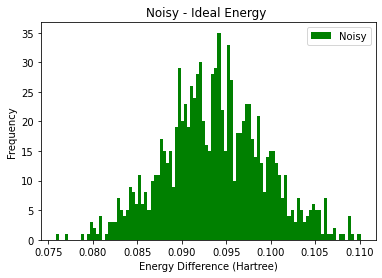

In [8]:
import numpy as np
import matplotlib.pyplot as plt

a = plt.figure()
plt.hist(diff_r, bins=100, color = "green", label = 'Noisy')
#plt.hist(diff_nr, bins=100, color = "lightcoral", label = 'Mitigated')
plt.title("Noisy - Ideal Energy ")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_noisy_restricted_full_3.png', dpi = 1000)

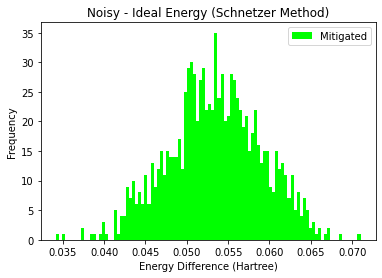

In [9]:
a = plt.figure()
#plt.hist(diff_r, bins=100, color = "red", label = 'Noisy')
plt.hist(diff_nr, bins=100, color = "lime", label = 'Mitigated')
plt.title("Noisy - Ideal Energy (Schnetzer Method)")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_Mitigated_Restricted_full_3.png', dpi = 1000)

In [10]:
energies

[[[0.0017943065186942246, -0.0014696602743016094, -0.1917835421295998],
  -1.0599149480282937,
  -0.9679264226376685,
  -1.0018670894903472],
 [[0.0011977640231349692, -0.0012221579557957288, -0.13630619865724358],
  -1.0879171452939183,
  -0.9972538152157934,
  -1.0382370945493984],
 [[0.0016554884601100162, -0.00199774533872097, -0.16941130626551062],
  -1.0710567937314184,
  -0.9798314519345435,
  -1.02014108216434],
 [[0.0016716866610423024, -0.0013319079246748675, -0.12159591962676759],
  -1.0983060613095434,
  -0.9976354070126685,
  -1.0411910571821983],
 [[0.0012093499495510825, -0.001336042878163478, -0.19313750230711435],
  -1.0548463445126686,
  -0.9526161199032935,
  -1.0019620833853409],
 [[0.0013911734770673074, -0.0015748219238621152, -0.11782325260395232],
  -1.0927752995907933,
  -0.9976896062314184,
  -1.037122034545292],
 [[0.001214321190671425, -0.001461626304280603, -0.1902225474087806],
  -1.0541485906064183,
  -0.9600951238095435,
  -1.0107723397955974],
 [[0.0010

In [11]:
diff_r

[0.09198852539062519,
 0.09066333007812488,
 0.09122534179687491,
 0.10067065429687494,
 0.10223022460937503,
 0.09508569335937489,
 0.09405346679687476,
 0.0972443847656248,
 0.09174438476562496,
 0.08933007812500005,
 0.09427197265624987,
 0.08416674804687485,
 0.09435424804687509,
 0.09386694335937484,
 0.08923095703124995,
 0.10523657226562488,
 0.09337255859374993,
 0.09507885742187505,
 0.0913210449218751,
 0.08752539062499975,
 0.09894506835937489,
 0.105118896484375,
 0.09684814453125001,
 0.09755566406250016,
 0.08674609375000009,
 0.09771337890625009,
 0.08751586914062504,
 0.09109936523437512,
 0.09644140625000008,
 0.09807739257812487,
 0.09194921874999995,
 0.0971542968750001,
 0.09364794921874986,
 0.09480444335937488,
 0.10310107421875014,
 0.08662280273437495,
 0.09750000000000014,
 0.09576171874999995,
 0.09200830078125,
 0.1005429687499999,
 0.08756665039062506,
 0.08002978515625003,
 0.10602954101562512,
 0.08990576171874987,
 0.09597973632812495,
 0.0970593261718750

In [12]:
diff_nr

[0.05804785853794647,
 0.049680050744519866,
 0.050915711567078414,
 0.05711500412734516,
 0.05288426112732769,
 0.05565326504550128,
 0.04337625081082086,
 0.05615605838389026,
 0.04205078756963543,
 0.05145919742041549,
 0.04572911302270932,
 0.05048049125899645,
 0.04935555817880055,
 0.058510384756561784,
 0.05405729566115314,
 0.053736201478354895,
 0.04703298545529977,
 0.059602657406612414,
 0.050328156598176355,
 0.04637615726829569,
 0.04585061538938495,
 0.0626771495584777,
 0.05360117229233441,
 0.055008591245993665,
 0.05385863285900894,
 0.05241087978861447,
 0.050701734799488696,
 0.0502660339877139,
 0.0580122616789196,
 0.057088268610729465,
 0.0563518239898122,
 0.05353399737198572,
 0.04735128795358268,
 0.05223346938434825,
 0.04908586705131346,
 0.05402790271844293,
 0.054925113574576745,
 0.050100953251392744,
 0.06345653626077108,
 0.05529442488828362,
 0.048871273859604214,
 0.04793875814398296,
 0.05630537159461246,
 0.05072670033959081,
 0.05731790579636176,
 0

# Without Readout